In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
# 读取数据
df = pd.read_csv("../../data/fifa19/data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [14]:
df.shape

(18207, 89)

In [15]:
df.columns 

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [16]:
# Unnamed: 0 看似没有用处，删掉它
df.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


有些列有空格，这样会阻碍分析，现在去除这些空格

In [18]:
df.columns = [c.replace(' ', '') for c in df.columns]

In [19]:
df.columns 

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'ClubLogo', 'Value', 'Wage', 'Special',
       'PreferredFoot', 'InternationalReputation', 'WeakFoot', 'SkillMoves',
       'WorkRate', 'BodyType', 'RealFace', 'Position', 'JerseyNumber',
       'Joined', 'LoanedFrom', 'ContractValidUntil', 'Height', 'Weight', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHan

工资现在时字符串形式并且含有字符

In [20]:
df['Wage'].head()

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

In [28]:
# 有些薪资并没有以K结尾
df[~df['Wage'].str.endswith("K")]["Wage"].head()

452    €0
538    €0
568    €0
677    €0
874    €0
Name: Wage, dtype: object

In [29]:
df.Wage = df.Wage.str.replace("€", "")
df.Wage = df.Wage.str.replace("K", "").astype("float")
df.Wage.head()

0    565.0
1    405.0
2    290.0
3    260.0
4    355.0
Name: Wage, dtype: float64

有多少不重复的球员

In [37]:
df.ID.unique().shape

(18207,)

In [ ]:
球员会有左撇子和右撇子。这样是否会影响他们的薪资呢？

In [51]:
counts_perferred_foot = df["PreferredFoot"].value_counts()
counts_perferred_foot = counts_perferred_foot.reset_index()
counts_perferred_foot.columns = ["PreferredFoot", "Count"]
counts_perferred_foot


,PreferredFoot,Count
0,Right,13948
1,Left,4211


Text(0.5, 1, 'Figure 1: \n\n Preffered Foot Count Plot')

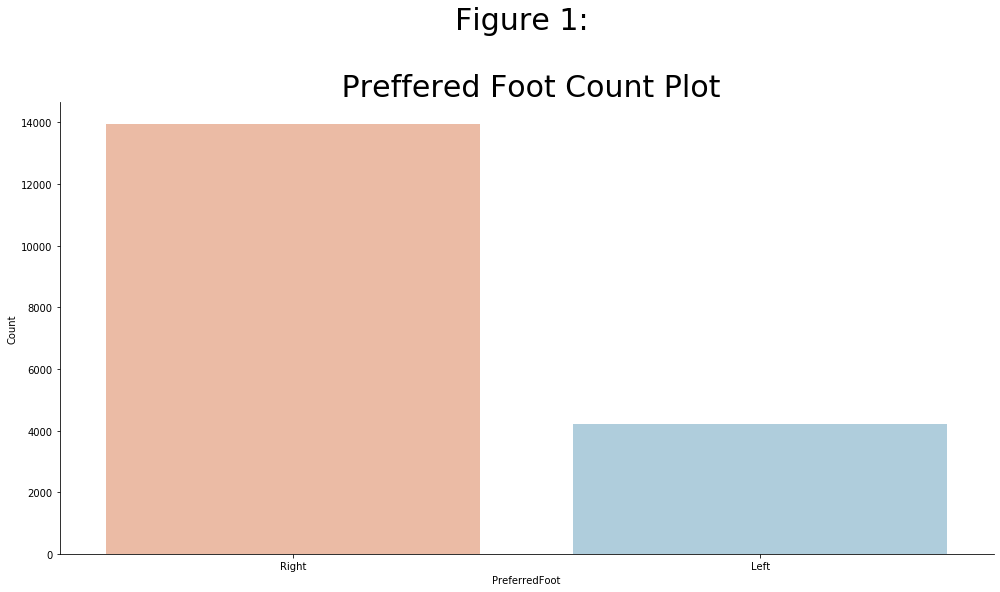

In [53]:
pt = sns.catplot(
    y="Count",
    x="PreferredFoot",
    data=counts_perferred_foot,
    palette="RdBu",
    height=7,
    aspect=2,
    kind="bar"
)
plt.title("Figure 1: \n\n Preffered Foot Count Plot", fontsize=30)

Text(0.5, 1, 'Figure 2: \n\n Overall Rating vs Preffered Foot')

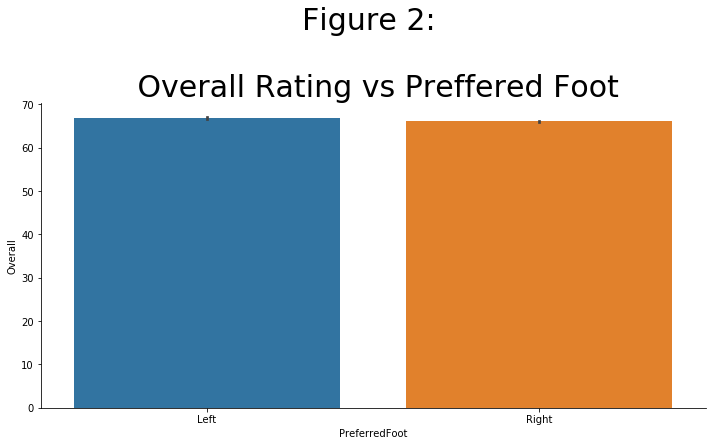

In [55]:
sns.catplot(
    x='PreferredFoot',
    y="Overall",
    data=df,
    aspect=2,
    kind="bar"
)
plt.title("Figure 2: \n\n Overall Rating vs Preffered Foot", fontsize=30)

Text(0.5, 1, 'Figure 3: \n\n PerferredFoot vs Wage')

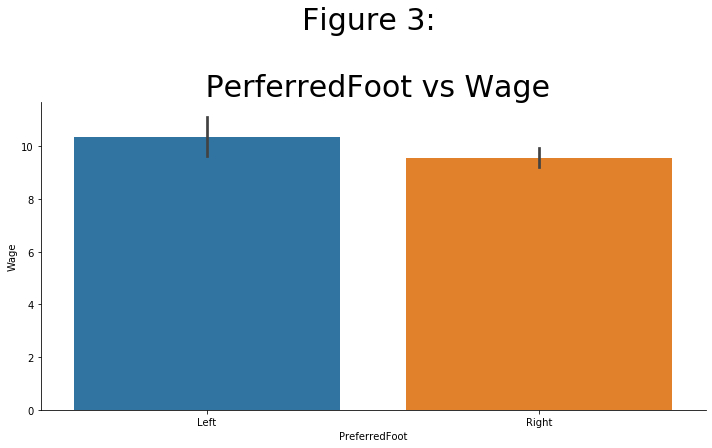

In [56]:
sns.catplot(
    x="PreferredFoot",
    y="Wage",
    data=df,
    aspect=2,
    kind="bar"
)
plt.title("Figure 3: \n\n PerferredFoot vs Wage", fontsize=30)

In [58]:
avgwage = df.groupby("PreferredFoot")["Wage"].mean()

In [63]:
df.groupby("PreferredFoot")["Wage"].mean()

PreferredFoot
Left     10.348373
Right     9.572699
Name: Wage, dtype: float64

In [67]:
counts_nationality = df["Nationality"].value_counts()
counts_nationality = counts_nationality.reset_index()
counts_nationality.columns = ["National", "Counts"]
counts_nationality.head()

,National,Counts
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914


Text(0.5, 1, 'Figure: \n\n\n Nation Wise Players Counts')

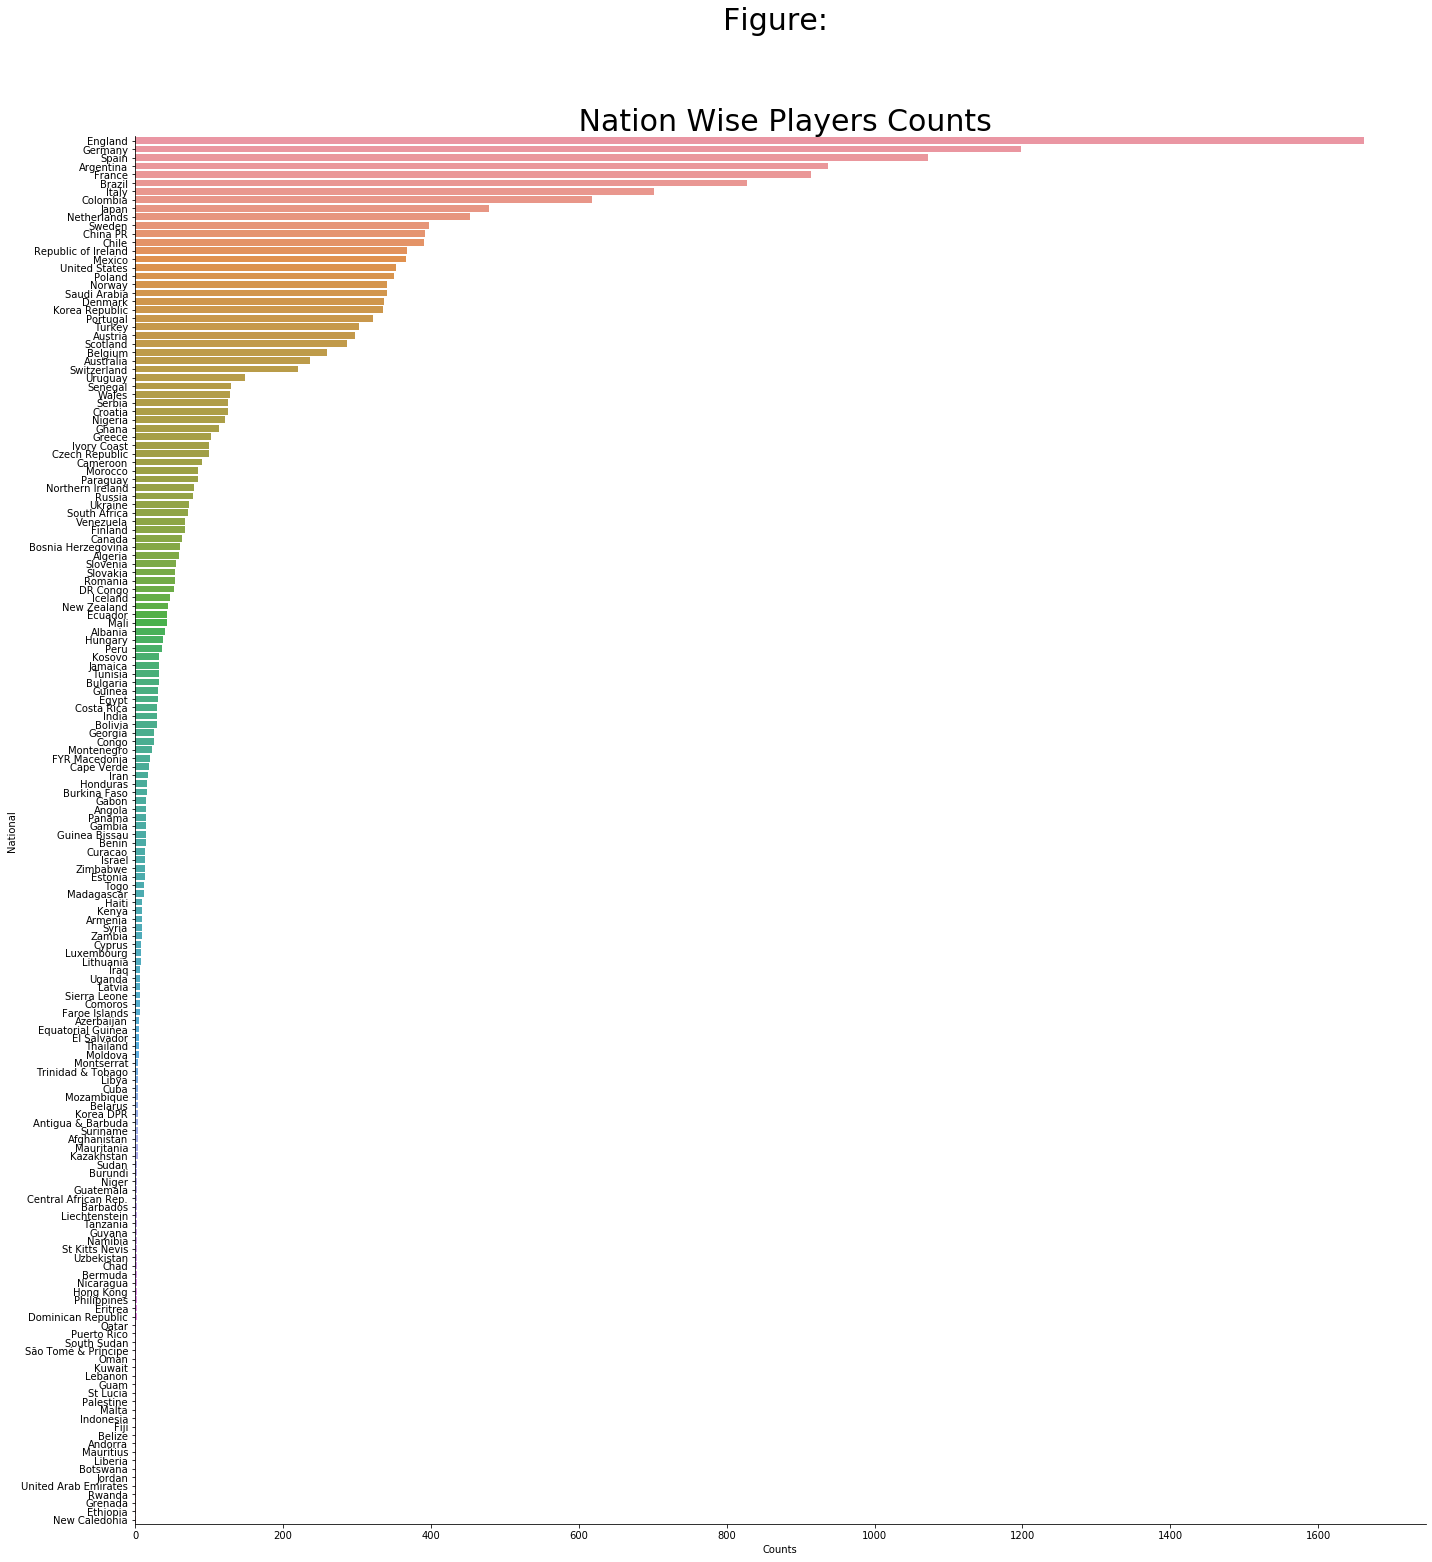

In [69]:
sns.catplot(
    y="National",
    x="Counts",
    data=counts_nationality,
    height=20,
    kind="bar"
)
plt.title("Figure: \n\n\n Nation Wise Players Counts", fontsize=30)

In [71]:
counts_nationality_top_20 = counts_nationality.iloc[0:20, :]
counts_nationality_top_20

,National,Counts
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914
5,Brazil,827
6,Italy,702
7,Colombia,618
8,Japan,478
9,Netherlands,453


Text(0.5, 1, 'Figure : \n\n\n Nation Wise Players Counts for top 20 contry')

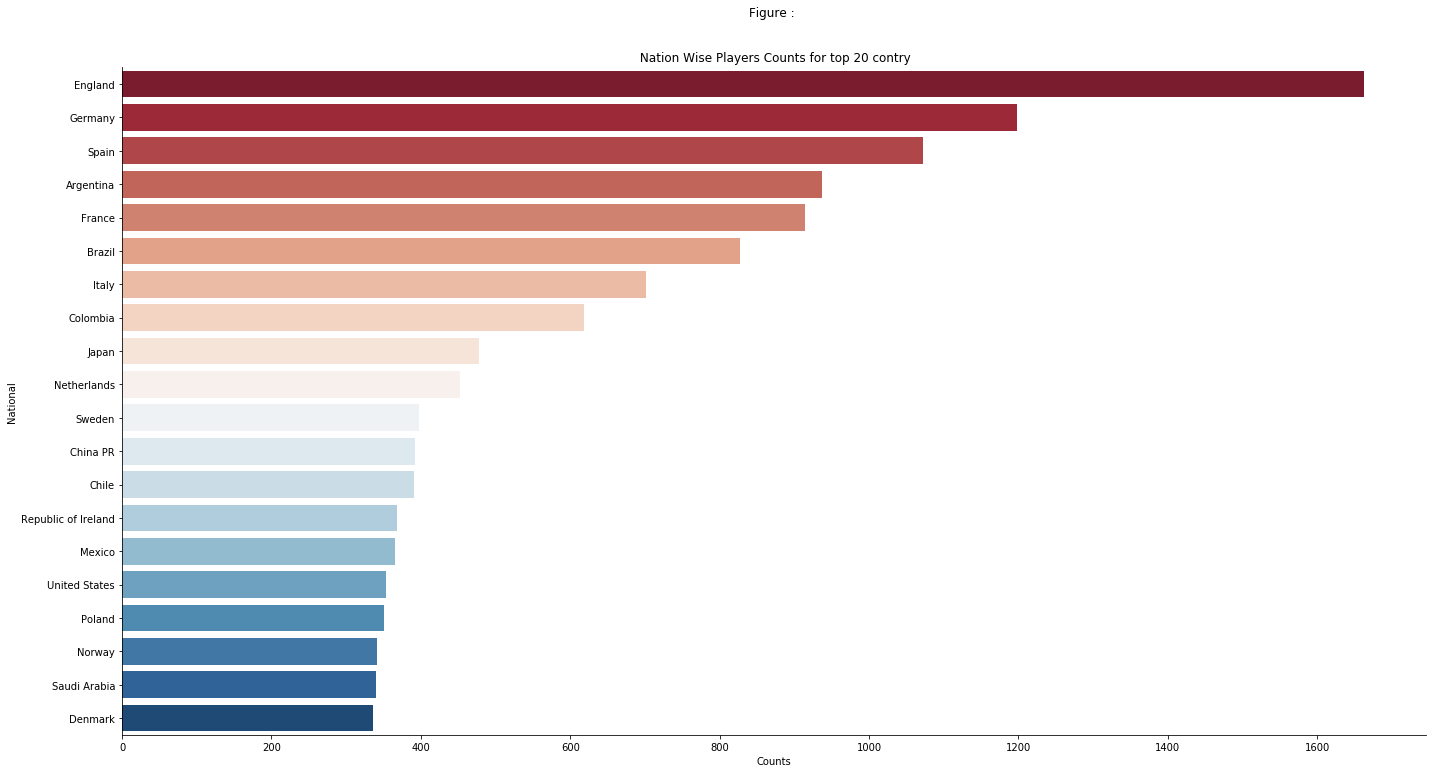

In [72]:
sns.catplot(
    y="National",
    x="Counts",
    data=counts_nationality_top_20,
    palette="RdBu",
    height=10,
    kind="bar",
    aspect=2
)
plt.title("Figure : \n\n\n Nation Wise Players Counts for top 20 contry", fontsize=12)

In [75]:
avgwageall = df.groupby("Nationality", as_index=False)["Wage", "Overall"].mean()
avgwageall.sort_values(by='Wage', inplace=True, ascending=False)
avgwageall.head()

,Nationality,Wage,Overall
42,Dominican Republic,71.000000,72.000000
156,United Arab Emirates,39.000000,77.000000
56,Gabon,26.933333,69.466667
7,Armenia,22.000000,69.000000
35,Croatia,21.682540,69.563492


In [76]:
top10bywage = avgwageall.iloc[0:10, :]
top10bywage

,Nationality,Wage,Overall
42,Dominican Republic,71.000000,72.000000
156,United Arab Emirates,39.000000,77.000000
56,Gabon,26.933333,69.466667
7,Armenia,22.000000,69.000000
35,Croatia,21.682540,69.563492
27,Central African Rep.,19.000000,73.333333
13,Belgium,18.480769,68.811538
2,Algeria,18.083333,70.633333
20,Brazil,17.778718,71.251511
47,Equatorial Guinea,17.200000,70.000000
